# Reading and Preprocessing

### Reading the data files

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Setting default style
plt.style.use('ggplot')

# load the data
data_dir = os.getcwd() + '\\data\\'

# reading sensors data
raw_data = pd.read_csv(data_dir + 'data.csv')

In [2]:
# Is there any missing data/ NULL values?
raw_data.isnull().values.any()

False

### Preparing Data

In [3]:
raw_data.head()

,﻿Time,Motion (Triggered),Distance (in CM),CO2 ( in PPM),Manual Occupancy (1 = TRUE)
0,11:26:40,1,80.14,422,1
1,11:26:41,1,72.97,406,1
2,11:26:42,1,-1.00,406,1
3,11:26:43,1,-1.00,406,1
4,11:26:44,1,74.98,406,1


In [4]:
# renaming column names
raw_data.columns = ['time', 'motion', 'distance', 'co2', 'label']

In [5]:
# generating TimeStamp values
from datetime import datetime

raw_data['timestamp'] = None

for index, row in raw_data.iterrows():
    raw_data.loc[index, 'timestamp'] = pd.Timestamp('2017-05-18 ' + row['time'], tz = None).timestamp()
    
raw_data.head()

,time,motion,distance,co2,label,timestamp
0,11:26:40,1,80.14,422,1,1.49512e+09
1,11:26:41,1,72.97,406,1,1.49512e+09
2,11:26:42,1,-1.00,406,1,1.49512e+09
3,11:26:43,1,-1.00,406,1,1.49512e+09
4,11:26:44,1,74.98,406,1,1.49512e+09


## Basic Visualization

### CO2 Data 

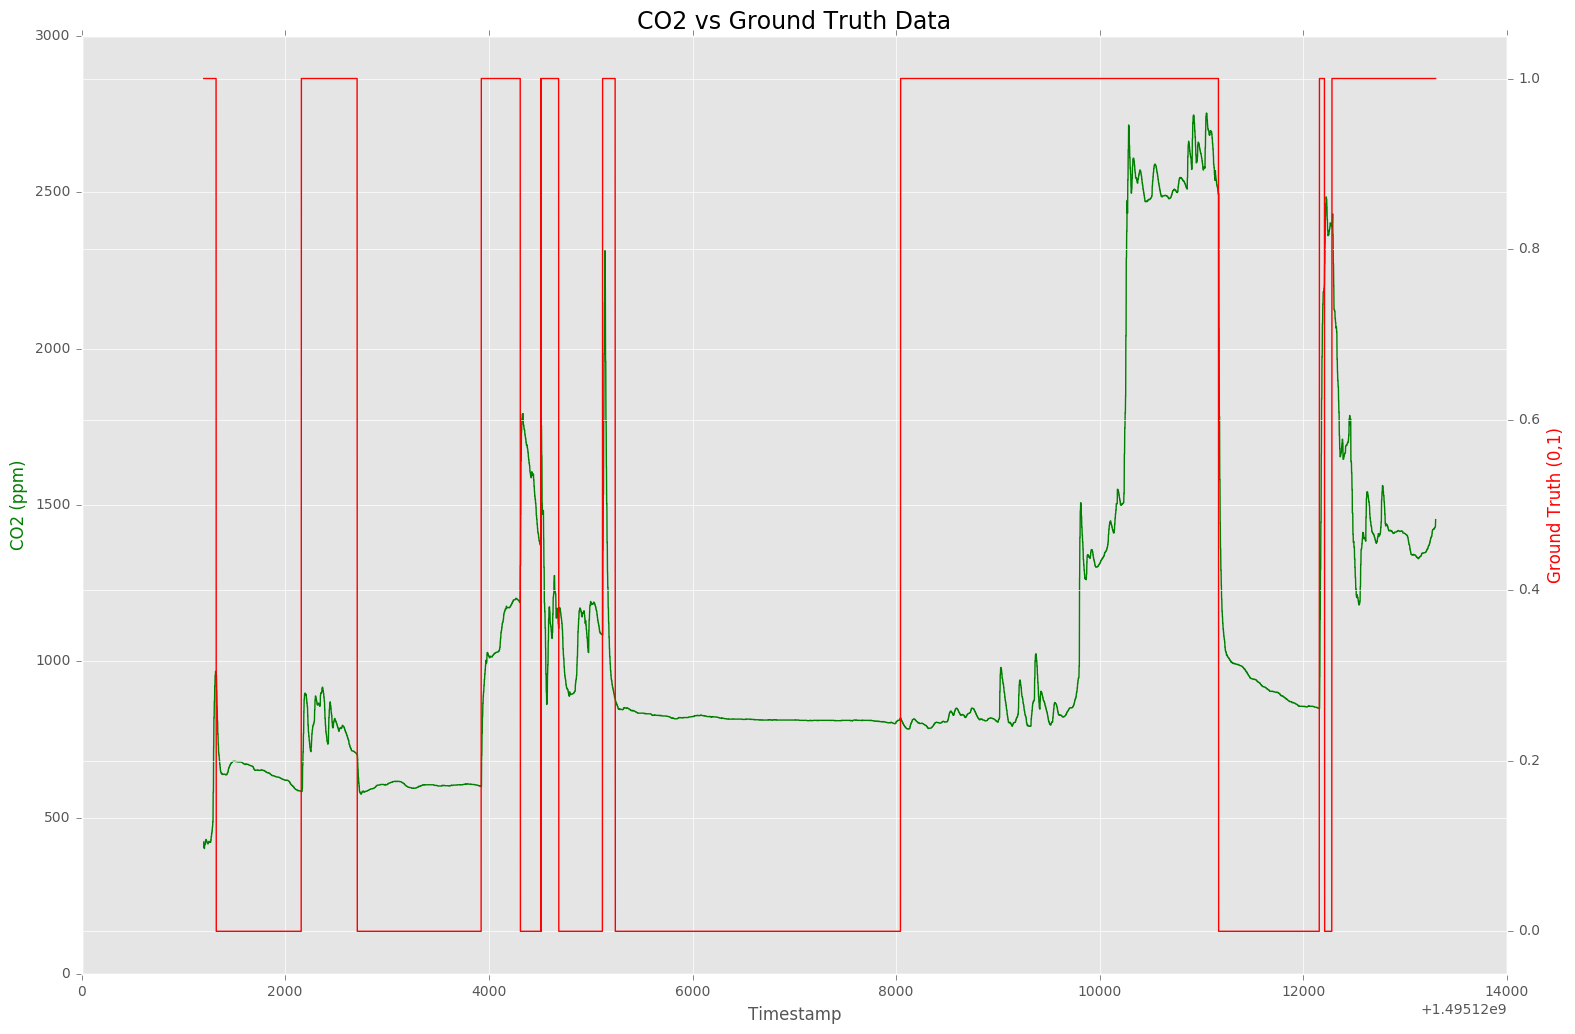

In [6]:
fig, ax1 = plt.subplots(figsize=(15,10))
fig.tight_layout()

x = raw_data['timestamp']
ax1.set_xlabel('Timestamp')

# CO2
ax1.set_title('CO2 vs Ground Truth Data', fontsize=17)
ax1.set_ylabel('CO2 (ppm)')
ax1.yaxis.label.set_color('green')
y1 = raw_data['co2']
ax1.plot(x, y1, 'g-')

# Groung truth
ax2 = ax1.twinx()
ax2.set_ylim([-0.05, 1.05]) 
ax2.set_ylabel('Ground Truth (0,1)')
ax2.yaxis.label.set_color('red')
y2 = raw_data['label']
ax2.plot(x, y2, 'r-')

plt.show()

### Motion Data

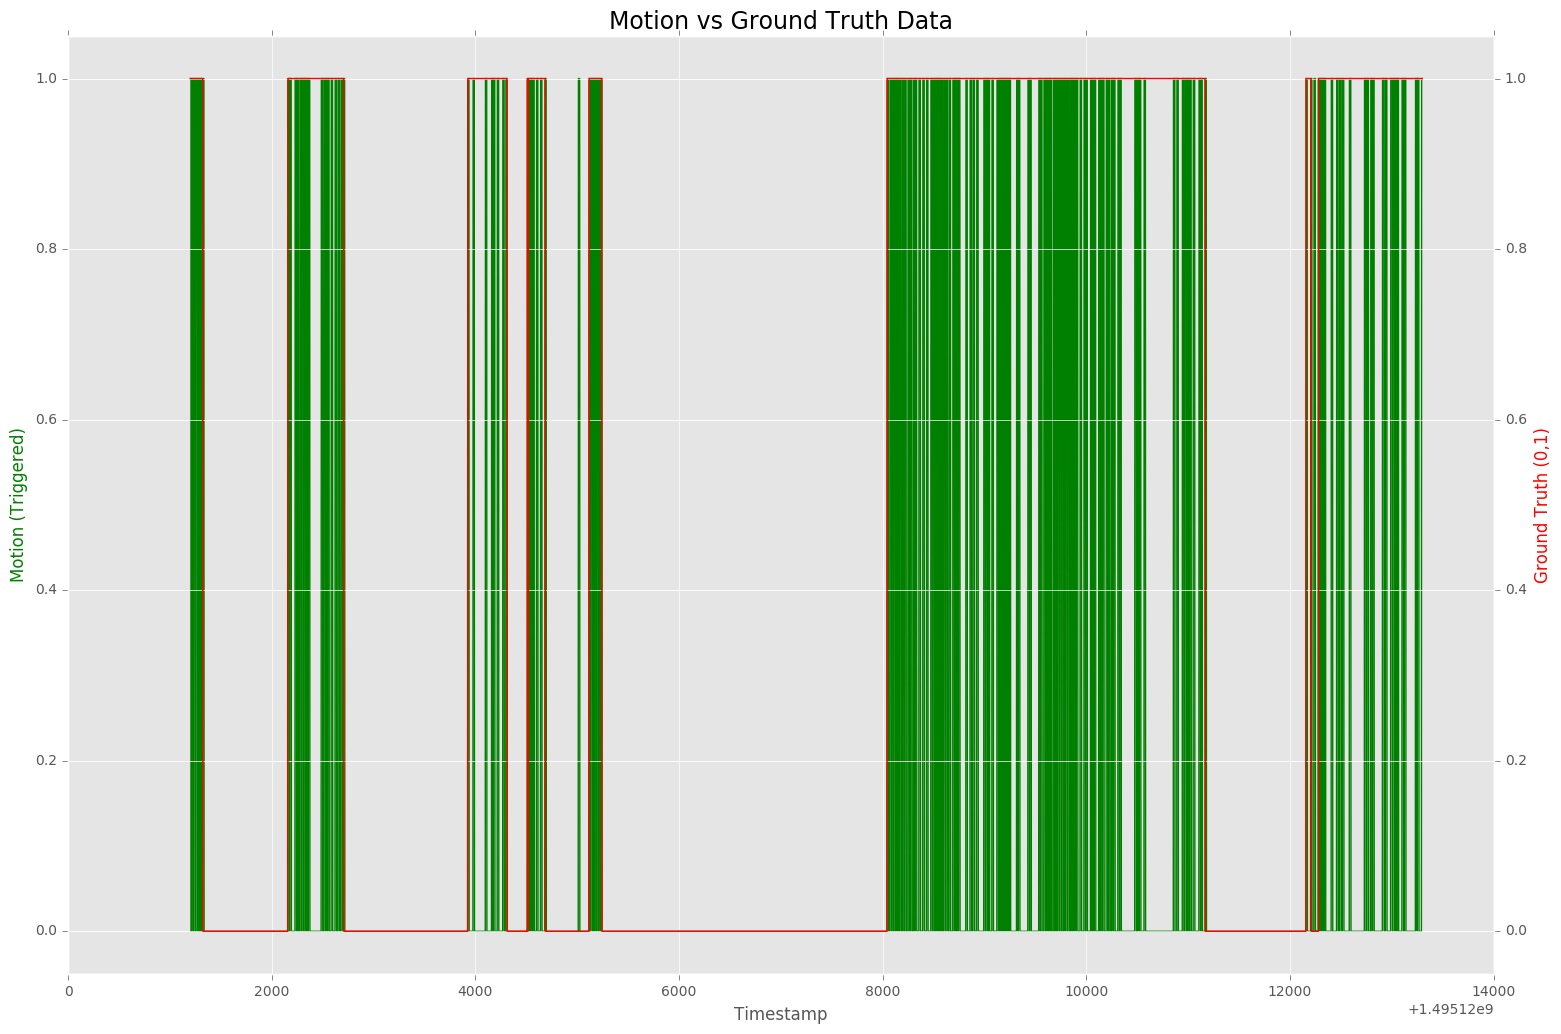

In [7]:
fig, ax1 = plt.subplots(figsize=(15,10))
fig.tight_layout()

x = raw_data['timestamp']
ax1.set_xlabel('Timestamp')

# Motion
ax1.set_title('Motion vs Ground Truth Data', fontsize=17)
ax1.set_ylabel('Motion (Triggered)')
ax1.yaxis.label.set_color('green')
ax1.set_ylim([-0.05, 1.05]) 
y1 = raw_data['motion']
ax1.plot(x, y1, 'g-')

# Groung truth
ax2 = ax1.twinx()
ax2.set_ylim([-0.05, 1.05]) 
ax2.set_ylabel('Ground Truth (0,1)')
ax2.yaxis.label.set_color('red')
y2 = raw_data['label']
ax2.plot(x, y2, 'r-')

plt.show()

In [8]:
raw_data['motion'].unique()

array([1, 0], dtype=int64)

Regarding to the values of the Motion Sensor's dataset, the data is binary pulses in each time step which represent if the sensor detects any motion or not. 

### Distance Data

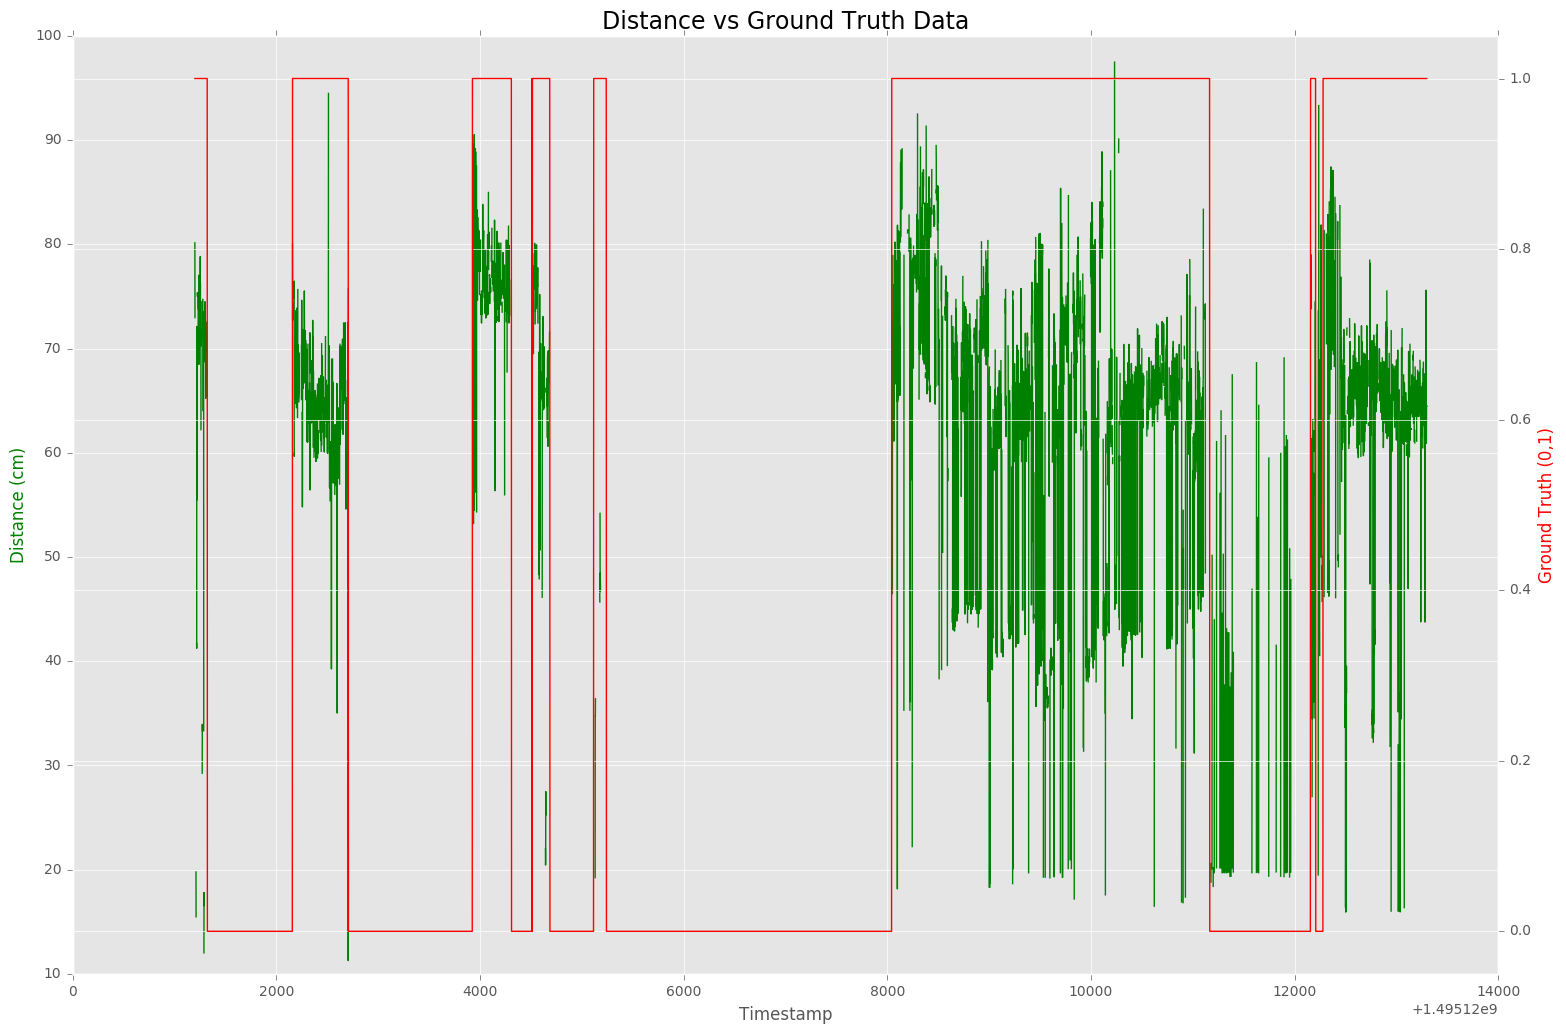

In [9]:
fig, ax1 = plt.subplots(figsize=(15,10))
fig.tight_layout()

x = raw_data['timestamp']
ax1.set_xlabel('Timestamp')

# Distance
ax1.set_title('Distance vs Ground Truth Data', fontsize=17)
ax1.set_ylabel('Distance (cm)')
ax1.yaxis.label.set_color('green')
#ax1.set_ylim([-0.1, 1.1]) 
y1 = raw_data['distance'].replace(-1,np.NaN)
ax1.plot(x, y1, 'g-')

# Groung truth
ax2 = ax1.twinx()
ax2.set_ylim([-0.05, 1.05]) 
ax2.set_ylabel('Ground Truth (0,1)')
ax2.yaxis.label.set_color('red')
y2 = raw_data['label']
ax2.plot(x, y2, 'r-')

plt.show()

## Getting all together

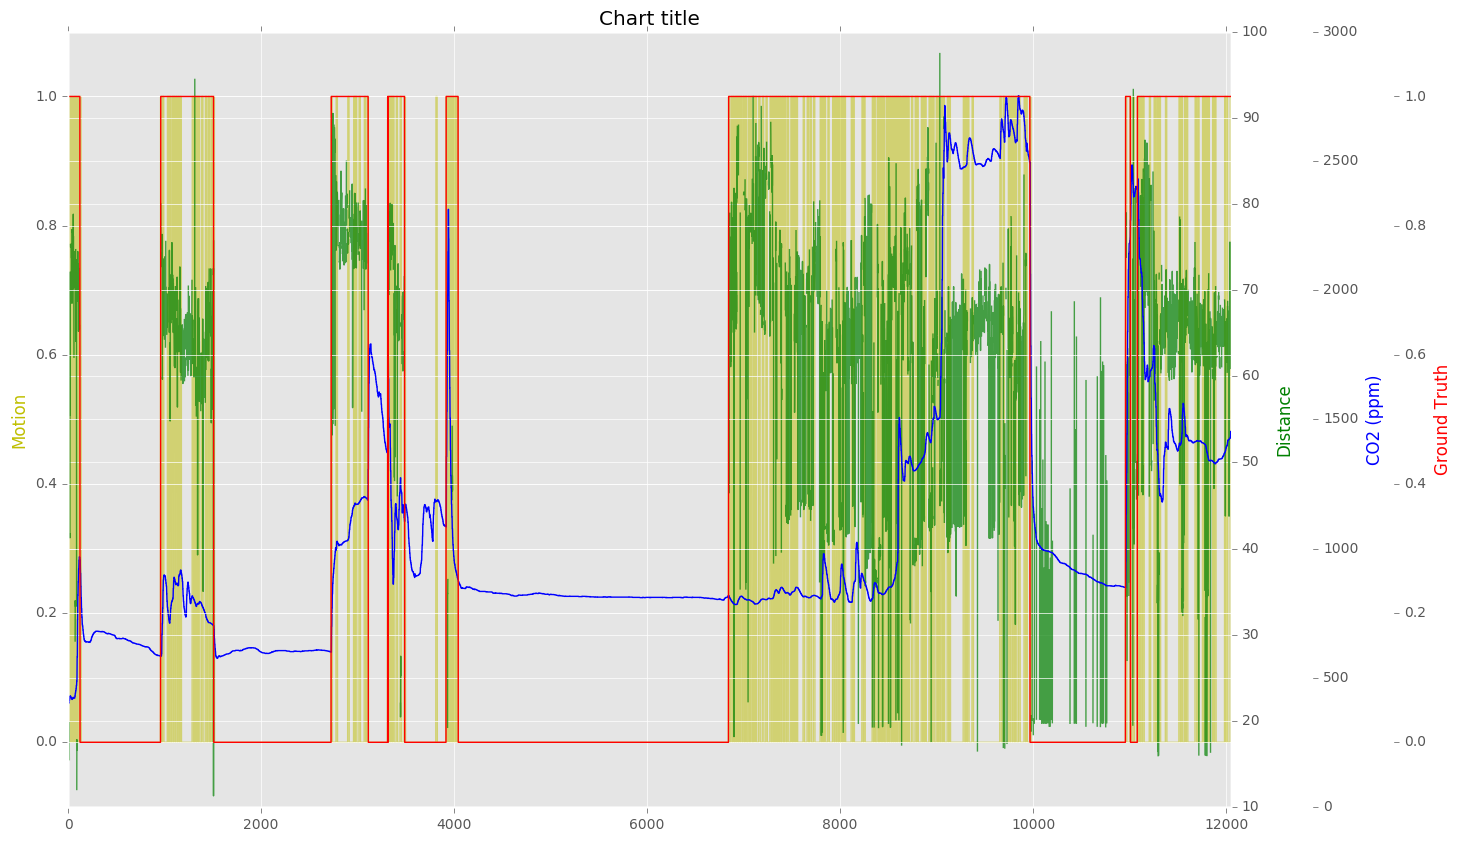

In [10]:
fig, ax1 = plt.subplots(figsize=(15,10))

ax2, ax3, ax4 = ax1.twinx(), ax1.twinx(), ax1.twinx()

ax1.set_ylim([-0.1, 1.1]) 
ax4.set_ylim([-0.1, 1.1]) 

rspine2 = ax2.spines['right']
rspine2.set_position(('axes', 1))
rspine3 = ax3.spines['right']
rspine3.set_position(('axes', 1.07))
rspine4 = ax4.spines['right']
rspine4.set_position(('axes', 1.14))

raw_data['label'].plot(ax=ax4, style='r-')
raw_data['motion'].plot(ax=ax1, style='y', alpha=.5)
raw_data['distance'].replace(-1,np.NaN).plot(ax=ax2, style='g', alpha=.7)
raw_data['co2'].plot(ax=ax3, style='b-')


ax4.set_ylabel('Ground Truth')
ax4.yaxis.label.set_color('r')
ax2.set_ylabel('Distance')
ax2.yaxis.label.set_color('g')
ax3.set_ylabel('CO2 (ppm)')
ax3.yaxis.label.set_color('b')
ax1.set_ylabel('Motion')
ax1.yaxis.label.set_color('y')

plt.title('Chart title')

plt.show()

For ease of use, we combine and save the data to be used in the next steps. 

In [11]:
raw_data.to_csv(data_dir + '1.csv', index = False)